In [1]:
using DrWatson
@quickactivate "Doran_etal_2022"

using LinearAlgebra
using StatsPlots
using StatsBase
using Distances

In [2]:
pdir = plotsdir("supp02_18x9data")
mkpath(pdir)

"/Users/ben/projects/Doran_etal_2022/plots/supp02_18x9data"

In [3]:
heatmapcols = [:purple, :black, :yellow];
generationcols = ["#B3D2FC" "#2B689E" "#338591"];

In [4]:
M = Float64.([
    1 0 1 0 0 0 0 1 1;
    0 1 1 0 0 0 0 1 1;
    1 1 0 0 0 0 0 1 1;
    1 0 1 0 0 0 1 1 0;
    0 1 1 0 0 0 1 1 0;
    1 1 0 0 0 0 1 1 0;
    1 0 1 0 0 0 1 0 1;
    0 1 1 0 0 0 1 0 1;
    1 1 0 0 0 0 1 0 1;
    1 0 1 0 1 1 0 0 0;
    0 1 1 0 1 1 0 0 0;
    1 1 0 0 1 1 0 0 0;
    1 0 1 1 1 0 0 0 0;
    0 1 1 1 1 0 0 0 0;
    1 1 0 1 1 0 0 0 0;
    1 0 1 1 0 1 0 0 0;
    0 1 1 1 0 1 0 0 0;
    1 1 0 1 0 1 0 0 0;
]);

In [5]:
usv = svd(M);

In [6]:
S = diagm(usv.S)
S[S.==0.0] .= NaN;

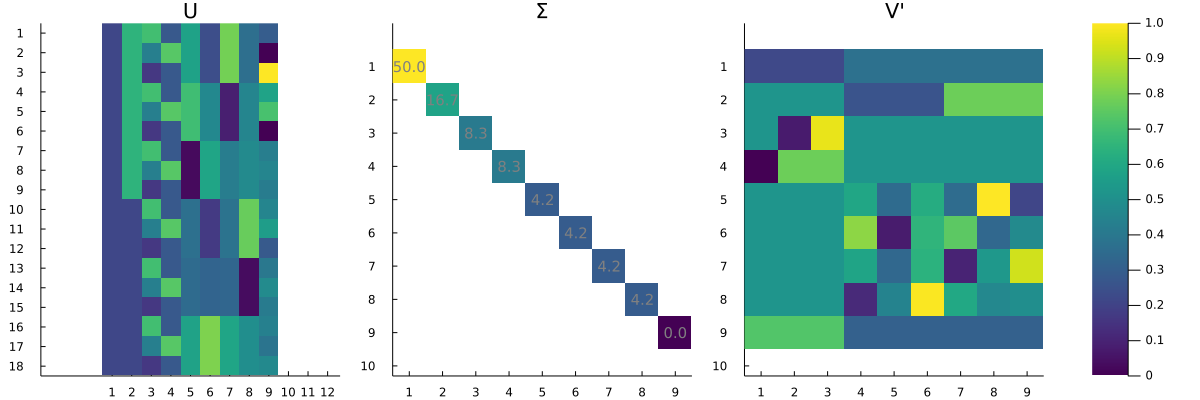

GKS: Rectangle definition is invalid in routine SET_VIEWPORT
GKS: Rectangle definition is invalid in routine SET_VIEWPORT
GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [16]:
l = @layout [a b c d{0.1w}]
plot(layout=l, size=(1200, 400), ratio=1, ticks=1:18, yflip=true, grid=false, colorbar=:none)
heatmap!(usv.U, c=:viridis, sp=1, title="U")
heatmap!(S, c=:viridis, sp=2, title="Σ")
fracvar = round.((usv.S.^2)/sum(usv.S.^2)*100, digits=1);
annotate!(1:9, 1:9, text.(string.(fracvar), 10, :grey),  sp=2)
heatmap!(usv.Vt, c=:viridis, sp=3, title="V'")
plot!([0], line_z=[0,1], c=:viridis, ratio=:auto, colorbar=true, frame=:none, label="", sp=4)

In [17]:
savefig(joinpath(pdir, "SVDdecomp_of_18x9data.svg"))

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


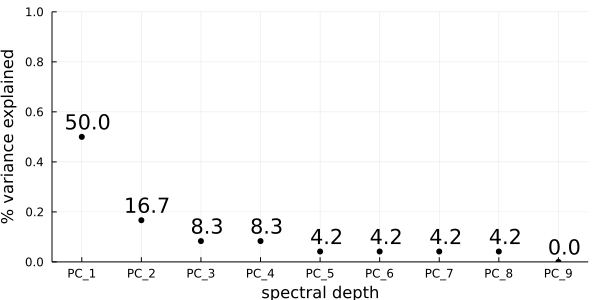

In [14]:
plot(markersize=5, legend=:none, ylims=(0,1), xticks=(1:9, ["PC_$i" for i in 1:9]), xlims=(.5,9.5), size=(600,300),
    ylabel="% variance explained",
    xlabel="spectral depth")
scatter!((usv.S.^2)/sum(usv.S.^2),  c=:black)
annotate!((1:length(usv.S)) .+ .1 , (usv.S.^2)/sum(usv.S.^2).+.06, round.((usv.S.^2)/sum(usv.S.^2)*100, digits=1))

In [15]:
savefig(joinpath(pdir, "fractionalvarianceof18x9.svg"))

# Plot paired distances

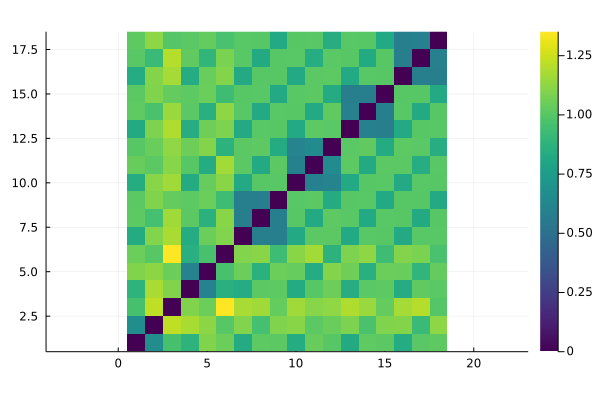

In [13]:
# basic Euclidean distance
Dij_euclidean = Distances.pairwise(Euclidean(), usv.U')
heatmap(Dij_euclidean, c=:viridis, ratio=1)

In [14]:
savefig(joinpath(pdir, "basiceuclideandistance.svg"))

plot spectral divergences

In [15]:
# using SCALES
# spires = SCALES.pairwise(SCALES.SpectralResiduals(), usv.U') 
using SPI
spires = calc_spi_trace(usv, groups=[i:i for i in 1:length(usv.S)])
spires = mapslices(cumsum, spires, dims=1)

9×153 Matrix{Float64}:
 1.0198e-15   4.07922e-16  2.03961e-16  …  5.43896e-16  3.39935e-16
 1.17478e-15  5.1124e-16   5.65574e-16     6.98873e-16  5.9823e-16
 0.451801     0.903602     6.52453e-16     0.903602     0.451801
 1.23434      0.903602     9.56532e-16     0.903602     1.23434
 1.23434      0.903602     0.169202        0.903602     1.23434
 1.23434      0.903602     0.49861      …  0.903602     1.23434
 1.23434      0.903602     1.49892         0.903602     1.23434
 1.23434      0.903602     1.62907         0.903602     1.23434
 1.23434      0.903602     1.62907         0.903602     1.23434

In [42]:
kron([1 0; 0 1],[1 0; 0 1], [0 0; 1 0])

8×8 Matrix{Int64}:
 0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0
 0  0  0  0  0  0  0  0
 0  0  0  0  1  0  0  0
 0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0

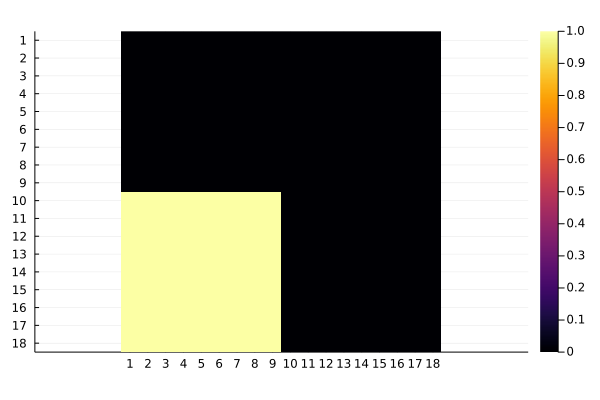

In [66]:
heatmap(F1mask, ticks=1:18, ratio=1, yflip=true)

In [54]:
## Plot SPI cumsum pairs by generation
trilmask = tril(trues(size(usv.U,1), size(usv.U,1)), -1)
F1mask = Bool.(kron([0 0; 1 0], [1 1 1; 1 1 1; 1 1 1], [1 1 1; 1 1 1; 1 1 1]))
F2mask = Bool.(kron([1 0; 0 1], [0 0 0; 1 0 0; 1 1 0], [1 1 1; 1 1 1; 1 1 1]))
F3mask = Bool.(kron([1 0; 0 1], [1 0 0; 0 1 0; 0 0 1], [0 0 0; 1 0 0; 1 1 0]));

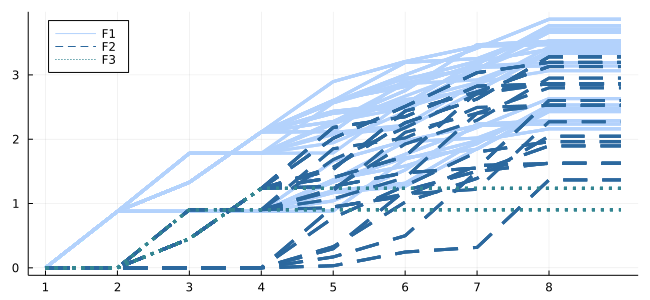

In [56]:

plot([0 0 0], 
    label=["F1" "F2" "F3"], 
    c=generationcols,
    linestyle=[:solid :dash :dot],
    size=(650, 300),
    legend=:topleft,
    xticks=1:8)
plot!(spires[:, F1mask[trilmask]],linewidth=3, c=generationcols[1],linestyle=:solid, label="")
plot!(spires[:, F2mask[trilmask]],linewidth=3, c=generationcols[2],linestyle=:dash,  label="")
plot!(spires[:, F3mask[trilmask]],linewidth=3, c=generationcols[3],linestyle=:dot,   label="")

In [57]:
savefig(joinpath(pdir, "spectral_residuals_trace_18x9.svg"))

In [58]:
partitioneddists = calc_spi_trace(usv.U, usv.S, [1:1, 2:2, 3:4, 5:8])
cumsumpdists = cumsum(partitioneddists, dims=1);

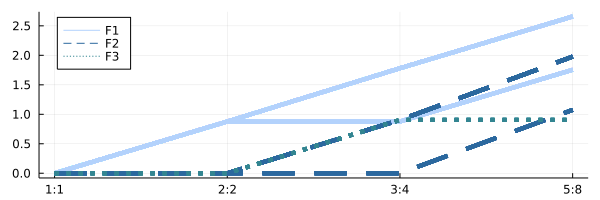

In [67]:
plot([0 0 0], 
    label=["F1" "F2" "F3"], 
    c=generationcols,
    linestyle=[:solid :dash :dot],
    legend=:topleft,
    linewidth=5,
    size=(600, 200),
    xticks=(1:4, ["1:1", "2:2", "3:4", "5:8"]))
plot!(cumsumpdists[:, F1mask[trilmask]], linewidth=4, c=generationcols[1],linestyle=:solid, label="")
plot!(cumsumpdists[:, F2mask[trilmask]], linewidth=4, c=generationcols[2],linestyle=:dash,  label="")
plot!(cumsumpdists[:, F3mask[trilmask]], linewidth=4, c=generationcols[3],linestyle=:dot,   label="")

In [68]:
savefig(joinpath(pdir, "partitioned_spectral_residuals_trace_18x9.svg"))

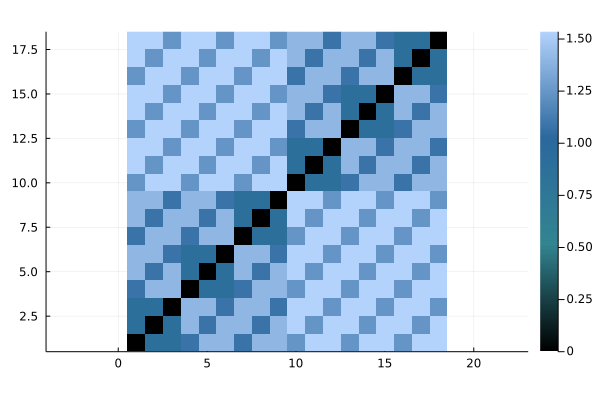

In [69]:
colors = [:black, reverse(generationcols)...]
heatmap(Distances.pairwise(WeightedEuclidean(usv.S), usv.U'), c=colors, ratio=1)

In [70]:
savefig(joinpath(pdir, "basic_weighted_euclideandistance_heatmap.svg"))

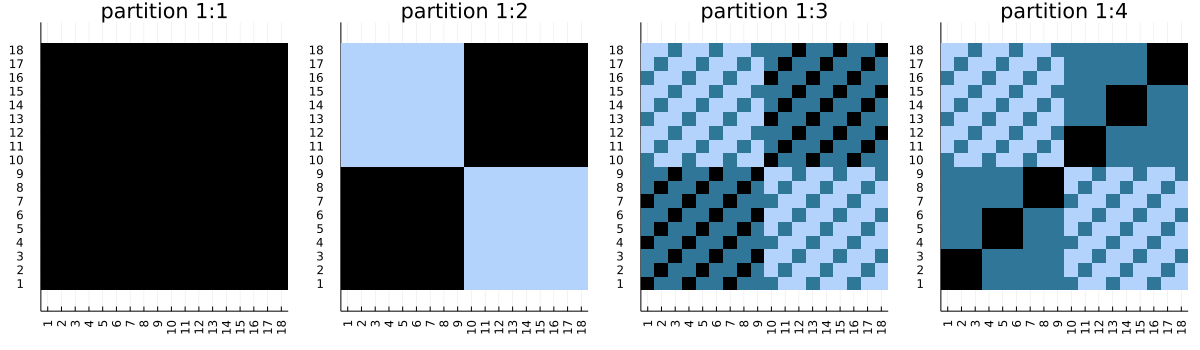

In [74]:
## Plot partitioned distance matrix (Partitioned Weighted Euclidean)
plot(layout=grid(1,4), size=(1200, 350), ratio=1, ticks=1:18,xrotation=90, colorbar=:none, bottommargin=5Plots.Measures.mm)
heatmap!(trunc.(SPI.reshape_pairstodistancematrix(cumsumpdists[1,:]), digits=13), sp=1, c=colors, title="partition 1:1")
heatmap!(SPI.reshape_pairstodistancematrix(cumsumpdists[2,:]),sp=2, c=colors,title="partition 1:2")
heatmap!(SPI.reshape_pairstodistancematrix(cumsumpdists[3,:]),sp=3, c=colors,title="partition 1:3")
heatmap!(trunc.(Int,SPI.reshape_pairstodistancematrix(cumsumpdists[4,:])),sp=4, c=colors,title="partition 1:4")

In [75]:
savefig(joinpath(pdir, "SPIdistancematrices_cumulativepartitions.svg"))

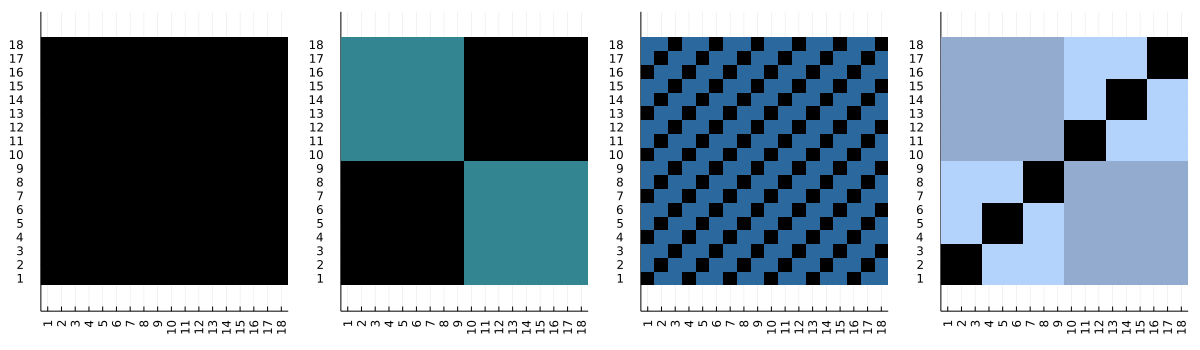

In [78]:

SPI.reshape_pairstodistancematrix(cumsumpdists[4,:])
## Plot partitioned distance matrix (SPI)
plot(layout=grid(1,4), size=(1200, 350), ratio=1, ticks=1:18, xrotation=90, colorbar=:none, bottommargin=5Plots.Measures.mm)
heatmap!(SPI.reshape_pairstodistancematrix(partitioneddists[1,:]),sp=1, c=:black)
heatmap!(SPI.reshape_pairstodistancematrix(partitioneddists[2,:]),sp=2, c=[:black, colors[2]])
heatmap!(SPI.reshape_pairstodistancematrix(partitioneddists[3,:]),sp=3, c=[:black, colors[3]])
heatmap!(SPI.reshape_pairstodistancematrix(partitioneddists[4,:]),sp=4, c=[:black, colors[4]])

In [79]:
savefig(joinpath(pdir, "SPIdistancematrices_individualpartitions.svg"))

In [89]:
gpairdist

32-element Vector{String}:
 "sample a"
 "sample a"
 "sample a"
 "sample a"
 "sample a"
 "sample a"
 "sample a"
 "sample a"
 "F3 sample b"
 "F3 sample b"
 ⋮
 "F2 sample e"
 "F1 sample q"
 "F1 sample q"
 "F1 sample q"
 "F1 sample q"
 "F1 sample q"
 "F1 sample q"
 "F1 sample q"
 "F1 sample q"

In [88]:
loadings

9×4 Matrix{Float64}:
 -0.235702     -0.235702     -0.235702     -0.235702
  0.235702      0.235702      0.235702     -0.235702
  1.91657e-16   1.91657e-16   1.52271e-16  -3.44323e-17
  0.333333      0.333333      0.333333      0.333333
  0.154503      0.154503      0.283069      0.158262
 -0.209208     -0.209208      0.0410884     0.405344
  0.386218      0.386218     -0.373854      0.168846
 -0.0736105    -0.0736105     0.0252785     0.0660515
 -0.462959     -0.462959      0.302181     -0.0499772

In [100]:
loadings

9×4 Matrix{Float64}:
 -0.235702   -0.235702     -0.235702     -0.235702
  0.235702    0.235702      0.235702     -0.235702
  0.288675    1.91657e-16   1.52271e-16  -3.44323e-17
 -0.166667    0.333333      0.333333      0.333333
  0.154503    0.154503      0.283069      0.158262
 -0.209208   -0.209208      0.0410884     0.405344
  0.386218    0.386218     -0.373854      0.168846
 -0.0736105  -0.0736105     0.0252785     0.0660515
 -0.150898   -0.462959      0.302181     -0.0499772

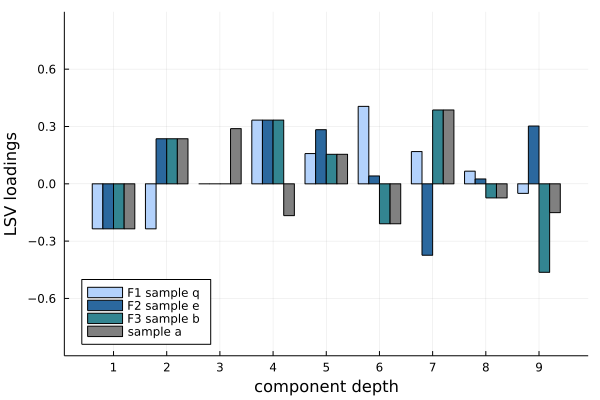

In [104]:
loadings = hcat(
    usv.U[1, 1:9],
    usv.U[2, 1:9],
    usv.U[5, 1:9],
    usv.U[17, 1:9],
)
gpairdist = repeat(["sample a", "F3 sample b", "F2 sample e", "F1 sample q"], inner = 9)
gcolors = [generationcols... :grey]
plot(ylabel="LSV loadings", xlabel="component depth", xticks=1:9, ylims=(-.9, .9))
groupedbar!(loadings[:], group=gpairdist, legend=:bottomleft, c=gcolors)
# (usv.S[2:end].^2)/sum(usv.S[2:end].^2).*100

In [105]:
savefig(joinpath(pdir, "LSVloading_by_componentdepth_18x9data.svg"))

In [42]:
# # Partitioned Co-Variance
# M
# heatmap(cor(M),c=[:purple, :black, :yellow], ticks=1:14, size=(480,400),ratio = 1)
# heatmap(cov(M),c=[:purple, :black, :yellow], ticks=1:14, size=(480,400),ratio = 1)
# covVF = (usv.V * (diagm(usv.S).^2) * usv.Vt)/7
# heatmap(covVF, c=[:purple, :black, :yellow], ticks=1:14, size=(480,400),ratio = 1, clim=(-1,1))
# covVF = M'M/7
# heatmap(covVF, c=[:purple, :black, :yellow], ticks=1:14, size=(480,400),ratio = 1,clim=(-1,1))
# covVF1 = (usv.V[:, 2:2] * (diagm(usv.S[2:2]).^2) * usv.Vt[2:2, :])
# heatmap(covVF1, c=[:purple, :black, :yellow], ticks=1:14, size=(480,400),ratio = 1, clim=(-1,1))
# grp = 3:4
# covVF2 = (usv.V[:, grp] * (diagm(usv.S[grp]).^2) * usv.Vt[grp, :])
# heatmap(covVF2, c=[:purple, :black, :yellow], ticks=1:14, size=(480,400),ratio = 1,clim=(-1,1))
# grp = 5:8
# covVF3 = (usv.V[:, grp] * (diagm(usv.S[grp]).^2) * usv.Vt[grp, :])
# heatmap(covVF3, c=[:purple, :black, :yellow], ticks=1:14, size=(480,400),ratio = 1, clim=(-1,1))
# covVF3 = usv.V[:, 5:8] * diagm(usv.S[5:8]) * usv.Vt[5:8, :]
# heatmap(covVF3, c=[:blue, :black, :darkorange])